In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

EDA **1**

In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df.selling_price

,selling_price
0,175000
1,45000
2,150000
3,65000
4,20000
...,...
1056,17000
1057,16000
1058,15000
1059,12000


In [ ]:
#1. What is the range of selling prices in the dataset ?
selling_price_range = (df['selling_price'].min(), df['selling_price'].max())

In [ ]:
selling_price_range

(5000, 760000)

In [ ]:
# 2. What is the median selling price for bikes in the dataset?
df.selling_price.median()#

45000.0

In [ ]:
#3. What is the most common seller type?
df.selling_price.value_counts().idxmax()

25000

In [ ]:
df.km_driven.value_counts()

,count
km_driven,
20000,39
40000,38
50000,37
25000,31
30000,28
...,...
33200,1
646000,1
3909,1


In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?
bikes_above_50km = (df['km_driven']>50000).sum()

In [ ]:
bikes_above_50km

170

In [ ]:
df.owner.value_counts()

,count
owner,
1st owner,924
2nd owner,123
3rd owner,11
4th owner,3


In [ ]:
# 5.What is the average km_driven value for each ownership type?
average_selling_price_by_owner = df.groupby('owner')['selling_price'].mean()

In [ ]:

avg_km_driven

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
df.year.unique()

array([2019, 2017, 2018, 2015, 2011, 2010, 2008, 2016, 2020, 2012, 2006,
       2013, 2009, 2014, 2004, 2007, 2000, 2002, 2005, 1997, 2001, 1988,
       1999, 1998, 1991, 2003, 1993, 1995])

In [ ]:
#6.What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = (df['year']<=2015).sum()/len(df)*100

In [ ]:
bikes_2015_or_older

56.64467483506126

In [ ]:
#7.What is the trend of missing values across the dataset?
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435
age,0
year_avg_price,0


In [ ]:
#8.What is the highest ex_showroom_price recorded, and for which bike?
df.ex_showroom_price.value_counts()

,count
ex_showroom_price,
50267.0,23
85011.0,20
54605.0,15
74295.0,14
78712.0,12
...,...
129662.0,1
66697.0,1
69983.0,1


In [ ]:
highest_ex_showroom_price = df.loc[df["ex_showroom_price"].idxmax(), ["name", "ex_showroom_price"]]

In [ ]:
highest_ex_showroom_price

,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


In [ ]:
#9.What is the total number of bikes listed by each seller type?
df.seller_type.value_counts()


,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'] == '1st owner'][['selling_price', 'km_driven']].corr()

In [ ]:
first_owner_bikes

,selling_price,km_driven
selling_price,1.000000,-0.243482
km_driven,-0.243482,1.000000


In [ ]:
#11.  Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df.km_driven.quantile(0.25)
Q3 = df.km_driven.quantile(0.75)
IQR = Q3 - Q1

outlier = df[~((df['km_driven']<(Q1 - 1.5*IQR)) | (df['km_driven']>(Q3+1.5*IQR)))]


In [ ]:
outlier

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price.
year_vs_price = df.groupby('year')['selling_price'].mean()

In [ ]:
year_vs_price

,selling_price
year,
1988,20000.000000
1991,6000.000000
1993,130000.000000
1995,150000.000000
1997,17500.000000
1998,28333.333333
1999,15000.000000
2000,20833.333333
2001,40000.000000


In [ ]:
# 13. Average depreciation in selling price based on bike’s age
current_year = 2025
df['age'] = current_year - df['year']
depreciation_analysis = df.groupby('age')['selling_price'].mean()

In [ ]:
depreciation_analysis

,selling_price
age,
5,183333.333333
6,119689.511628
7,87660.374046
8,78894.736842
9,58469.018692
10,56500.000000
11,48668.131868
12,51136.986301
13,35748.400000


In [ ]:
# 14. Bikes priced significantly above the average for their manufacturing year
df['year_avg_price'] = df.groupby('year')['selling_price'].transform('mean')
expensive_bikes = df[df['selling_price'] > (df['year_avg_price'] * 1.5)][['name', 'year', 'selling_price', 'year_avg_price']]

In [ ]:
df.year_avg_price

,year_avg_price
0,119689.511628
1,78894.736842
2,87660.374046
3,56500.000000
4,35655.721311
...,...
1056,31793.333333
1057,35748.400000
1058,51136.986301
1059,22267.857143


In [ ]:
#15. Correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True)

In [ ]:
correlation_matrix

,selling_price,year,km_driven,ex_showroom_price,age,year_avg_price
selling_price,1.000000,0.402188,-0.212937,0.918583,-0.402188,0.501140
year,0.402188,1.000000,-0.288675,0.126378,-1.000000,0.802547
km_driven,-0.212937,-0.288675,1.000000,-0.122011,0.288675,-0.309402
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000,-0.126378,0.146598
age,-0.402188,-1.000000,0.288675,-0.126378,1.000000,-0.802547
year_avg_price,0.501140,0.802547,-0.309402,0.146598,-0.802547,1.000000


**EDA2**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv("Car Sale.csv")

In [ ]:
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
dealer_avg_price = df1.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average Selling Price per Dealer:")
print(dealer_avg_price.head())



Average Selling Price per Dealer:
Dealer_Name
U-Haul CO                28769.919006
Classic Chevy            28602.014446
Rabun Used Car Sales     28527.536177
Iceberg Rentals          28522.958533
Enterprise Rent A Car    28312.580800
Name: Price ($), dtype: float64


In [ ]:
# 2. Which car brand (Company) has the highest variation in prices?
company_price_variation = df1.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Company with highest price variation:")
print(company_price_variation.head())



Company with highest price variation:
Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64


In [ ]:

# 3. What is the distribution of car prices for each transmission type?
transmission_price_distribution = df1.groupby('Transmission')['Price ($)'].describe()
print("Car Price Distribution by Transmission:")
print(transmission_price_distribution)



Car Price Distribution by Transmission:
                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  


In [ ]:
# 4. What is the distribution of car prices across different regions?
region_price_distribution = df1.groupby('Dealer_Region')['Price ($)'].describe()
print("Car Price Distribution by Region:")
print(region_price_distribution)



Car Price Distribution by Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          3

In [ ]:
# 5. What is the distribution of cars based on body styles?
body_style_distribution = df1['Body Style'].value_counts()
print("Car Distribution by Body Style:")
print(body_style_distribution)


Car Distribution by Body Style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [ ]:
# 6. How does the average selling price vary by customer gender and annual income?
gender_income_price = df1.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
print("Price Variation by Gender and Income:")
print(gender_income_price.head())



Price Variation by Gender and Income:
   Gender  Annual Income     Price ($)
0  Female          13500  28132.038732
1  Female         106000  46001.000000
2  Female         121000  20000.000000
3  Female         190000  19001.000000
4  Female         211000  51000.000000


In [ ]:

# 7. What is the distribution of car prices by region and number of cars sold?
region_car_count = df1.groupby('Dealer_Region').size()
print("Number of Cars Sold by Region:")
print(region_car_count)



Number of Cars Sold by Region:
Dealer_Region
Aurora        3130
Austin        4135
Greenville    3128
Janesville    3821
Middletown    3128
Pasco         3131
Scottsdale    3433
dtype: int64


In [ ]:
# 8. How does the average car price differ between cars with different engine sizes?
engine_price_distribution = df1.groupby('Engine')['Price ($)'].describe()
print("Car Price by Engine Size:")
print(engine_price_distribution)


Car Price by Engine Size:
                             count          mean           std     min  \
Engine                                                                   
DoubleÂ Overhead Camshaft  12571.0  28248.525972  13747.070597  1200.0   
Overhead Camshaft          11335.0  27914.710631  15862.871978  1700.0   

                               25%      50%      75%      max  
Engine                                                         
DoubleÂ Overhead Camshaft  19000.0  24000.0  35500.0  75700.0  
Overhead Camshaft          17000.0  22001.0  34000.0  85800.0  


In [ ]:
# 9. How do car prices vary based on the customer’s annual income bracket?
income_brackets = pd.cut(df1['Annual Income'], bins=[0, 50000, 100000, 500000, 1000000, df1['Annual Income'].max()],
                         labels=['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High'])
income_price_variation = df1.groupby(income_brackets)['Price ($)'].describe()
print("Car Price by Income Bracket:")
print(income_price_variation)



Car Price by Income Bracket:
                count          mean           std      min      25%      50%  \
Annual Income                                                                  
Low            5275.0  27884.297820  14909.070561   1200.0  18000.0  22001.0   
Lower-Mid         1.0  43000.000000           NaN  43000.0  43000.0  43000.0   
Mid            2207.0  28563.329860  15093.212478   9000.0  18501.0  24000.0   
Upper-Mid      8875.0  28011.726423  14740.941729   4200.0  18000.0  23000.0   
High           7548.0  28186.202040  14669.007359   1450.0  18500.0  23000.0   

                   75%      max  
Annual Income                    
Low            34000.0  85001.0  
Lower-Mid      43000.0  43000.0  
Mid            36000.0  85500.0  
Upper-Mid      34000.0  85001.0  
High           34001.0  85800.0  


In [ ]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models_sales = df1['Model'].value_counts().head(5)
print("Top 5 Selling Car Models:")
print(top_models_sales)


Top 5 Selling Car Models:
Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


In [ ]:
# 11. How does car price vary with engine size across different car colors?
color_price_distribution = df1.groupby('Color')['Price ($)'].describe()
print("Car Price by Color:")
print(color_price_distribution)



Car Price by Color:
              count          mean           std     min      25%      50%  \
Color                                                                       
Black        7857.0  28564.798015  15286.065976  1200.0  18000.0  24500.0   
Pale White  11256.0  27483.890370  14077.346859  4200.0  18000.0  22001.0   
Red          4793.0  28736.319007  15519.360962  1450.0  19000.0  24000.0   

                75%      max  
Color                         
Black       36000.0  85800.0  
Pale White  33000.0  82800.0  
Red         34000.0  82600.0  


In [ ]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
monthly_sales = df1.groupby(df1['Date'].dt.month)['Car_id'].count()
print("Monthly Car Sales Trend:")
print(monthly_sales)



AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
body_transmission_price = df1.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
print("Car Price by Body Style and Transmission:")
print(body_transmission_price)



Car Price by Body Style and Transmission:
                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.

In [ ]:
# 14. What is the correlation between car price, engine size, and annual income of customers?
correlation_matrix = df1[['Price ($)', 'Annual Income']].corr()
print("Correlation between Price and Income:")
print(correlation_matrix)


Correlation between Price and Income:
               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


In [ ]:
# 15. How does the average car price vary across different car models and engine types?
model_engine_price = df1.groupby(['Model', 'Engine'])['Price ($)'].describe()
print("Car Price by Model and Engine Type:")
print(model_engine_price.head())

Car Price by Model and Engine Type:
                                  count          mean           std      min  \
Model  Engine                                                                  
3-Sep  DoubleÂ Overhead Camshaft  171.0  37986.380117  21403.933176  18000.0   
3000GT DoubleÂ Overhead Camshaft  156.0  22764.326923   8455.941265  12000.0   
       Overhead Camshaft          147.0  21770.659864   2017.005771  18000.0   
300M   DoubleÂ Overhead Camshaft  243.0  21394.888889   4229.419059  16000.0   
323i   DoubleÂ Overhead Camshaft  223.0  16744.632287   4867.612734   9000.0   

                                      25%      50%      75%      max  
Model  Engine                                                         
3-Sep  DoubleÂ Overhead Camshaft  23000.0  26000.0  69000.0  69980.0  
3000GT DoubleÂ Overhead Camshaft  19000.0  19000.0  19500.0  39500.0  
       Overhead Camshaft          20001.0  21001.0  24000.0  24900.0  
300M   DoubleÂ Overhead Camshaft  16001.0  22000

EDA **3**

In [20]:
import re
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [21]:
|df2 = pd.read_csv("amazon.csv")

SyntaxError: invalid syntax (<ipython-input-21-ecdb11907eb6>, line 1)

In [22]:
df2

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [23]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [24]:
avg_rating_per_category = df2.groupby("category")["rating"].mean().sort_values(ascending=False)
print("Average rating per category:\n", avg_rating_per_category)

TypeError: agg function failed [how->mean,dtype->object]

In [25]:
# Question 2: Top rating_count products by category
top_rated_products = df2.loc[df2.groupby("category")["rating_count"].idxmax(), ["category", "product_name", "rating_count"]]
print("Top rating_count products by category:\n", top_rated_products)


Top rating_count products by category:
                                                category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With 

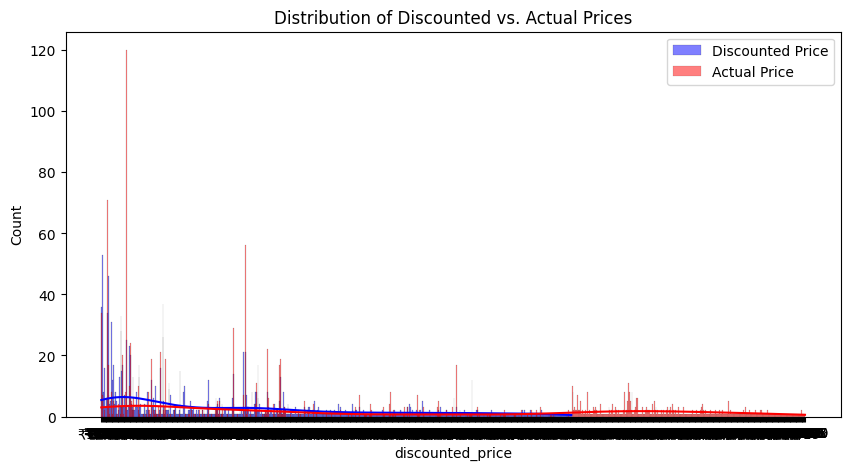

In [26]:
# Question 3: Distribution of discounted prices vs. actual prices
plt.figure(figsize=(10, 5))
sns.histplot(df2["discounted_price"], kde=True, color='blue', label='Discounted Price')
sns.histplot(df2["actual_price"], kde=True, color='red', label='Actual Price')
plt.legend()
plt.title("Distribution of Discounted vs. Actual Prices")
plt.show()


In [27]:
# Question 4: Average discount percentage by category
avg_discount_per_category = df2.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)
print("Average discount percentage per category:\n", avg_discount_per_category)



TypeError: agg function failed [how->mean,dtype->object]

In [28]:


# Question 5: Most popular product names (highest rating count)
most_popular_products = df2.nlargest(10, "rating_count")[["product_name", "rating_count"]]
print("Most popular products:\n", most_popular_products)



TypeError: Column 'rating_count' has dtype object, cannot use method 'nlargest' with this dtype

In [29]:
# Question 6: Most popular product keywords
all_words = " ".join(df2["product_name"].dropna()).lower()
word_list = re.findall(r'\b\w+\b', all_words)
most_common_keywords = Counter(word_list).most_common(10)
print("Most common product keywords:", most_common_keywords)



Most common product keywords: [('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('and', 331), ('c', 289), ('3', 275), ('2', 267)]


In [31]:
# Question 7: Most popular product reviews
most_popular_reviews = df2.nlargest(10, "rating_count")[["review_title", "review_content", "rating_count"]]
print("Most popular product reviews:\n", most_popular_reviews)



TypeError: Column 'rating_count' has dtype object, cannot use method 'nlargest' with this dtype

In [33]:
# Question 8: Correlation between discounted price and rating
correlation_discount_rating = df2["discounted_price"].corr(df2["rating"])
print("Correlation between discounted price and rating:", correlation_discount_rating)


ValueError: could not convert string to float: '₹399'

In [34]:
# Question 9: Top 5 categories based on highest ratings
top_5_categories = avg_rating_per_category.head(5)
print("Top 5 categories based on highest ratings:\n", top_5_categories)


NameError: name 'avg_rating_per_category' is not defined

In [35]:
# Question 10: Potential areas for improvement
print("Potential areas for improvement:")
if correlation_discount_rating < 0:
    print("- High discounts correlate with low ratings; pricing strategies may need improvement.")
if avg_rating_per_category.min() < 3:
    print("- Some categories have low ratings; product quality improvements may be needed.")
print("- Optimize product listings based on popular keywords.")
print("- Adjust discount strategies based on high-selling low-discount products.")



Potential areas for improvement:


NameError: name 'correlation_discount_rating' is not defined

EDA **4**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [37]:
df3 = pd.read_csv("spotify.csv")

In [39]:
df3

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [40]:
df3.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [38]:
# 1. Check for null values and duplicates
def check_data(df3):
    print("Null values:")
    print(df3.isnull().sum())
    print("\nDuplicate rows:", df3.duplicated().sum())

check_data(df3)


Null values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows: 27


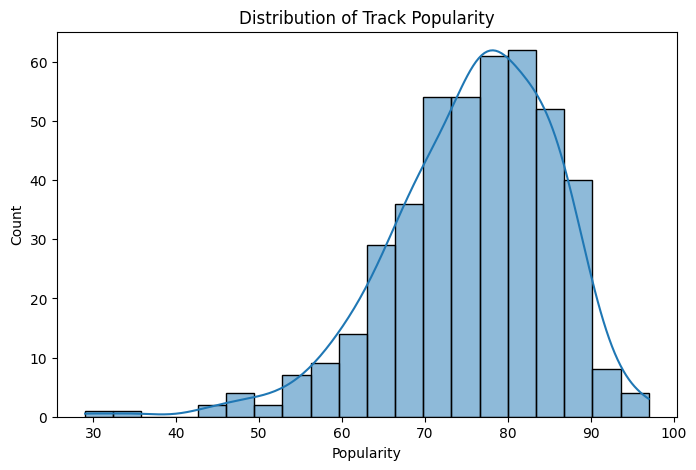

In [41]:
# 2. Distribution of popularity
plt.figure(figsize=(8,5))
sns.histplot(df3['Popularity'], bins=20, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()




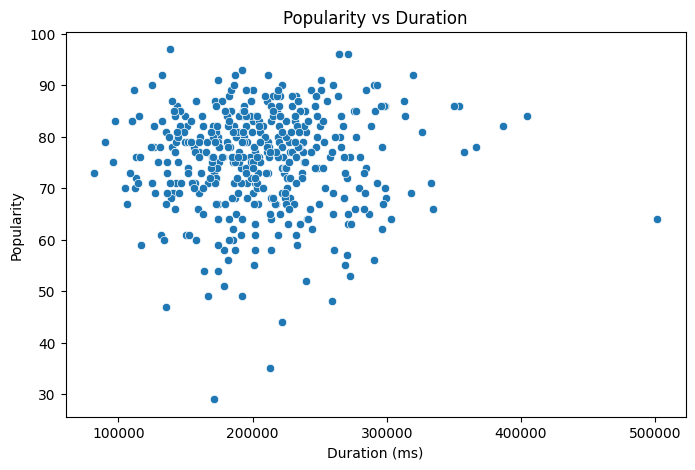

In [42]:
# 3. Relationship between Popularity and Duration
plt.figure(figsize=(8,5))
sns.scatterplot(x=df3['Duration (ms)'], y=df3['Popularity'])
plt.title("Popularity vs Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()



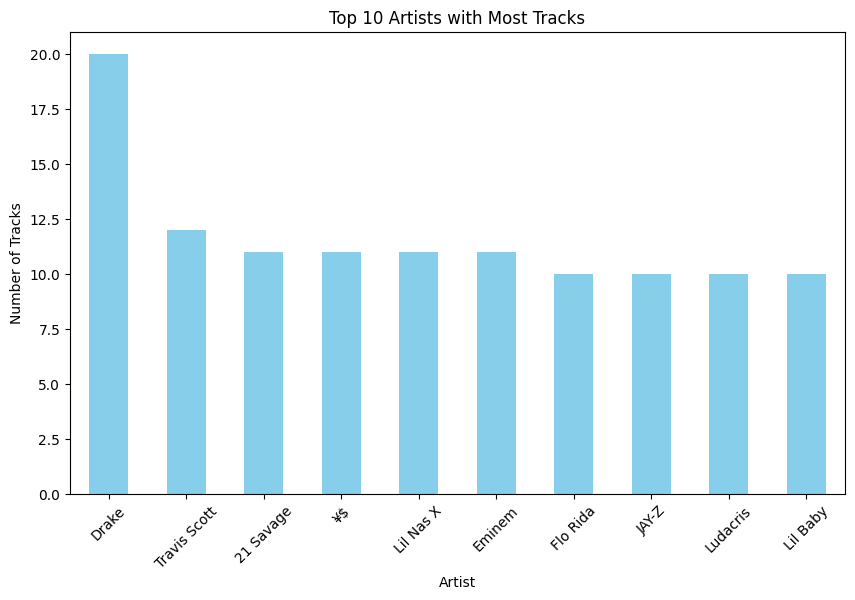

In [43]:
# 4. Artist with highest number of tracks
plt.figure(figsize=(10,6))
df3['Artist'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Artists with Most Tracks")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.show()



In [46]:
# 5. Five least popular tracks
least_popular = df3.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("\nFive least popular trac")


Five least popular trac


In [47]:
# 6. Most popular artist on average
popular_artists = df3.groupby('Artist')['Popularity'].mean().nlargest(5)
print("\nTop 5 artists with highest average popularity:\n", popular_artists)




Top 5 artists with highest average popularity:
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


In [48]:
# 7. Most popular tracks for top 5 artists
for artist in popular_artists.index:
    top_track = df3[df3['Artist'] == artist].nlargest(1, 'Popularity')[['Track Name', 'Popularity']]
    print(f"\nMost popular track by {artist}:\n", top_track)




Most popular track by cassö:
     Track Name  Popularity
140      Prada          92

Most popular track by Trueno:
                        Track Name  Popularity
241  Mamichula - con Nicki Nicole          89

Most popular track by David Guetta:
              Track Name  Popularity
200  Baby Don't Hurt Me          87

Most popular track by Travis Scott:
                     Track Name  Popularity
30  FE!N (feat. Playboi Carti)          93

Most popular track by ¥$:
     Track Name  Popularity
260   CARNIVAL          96


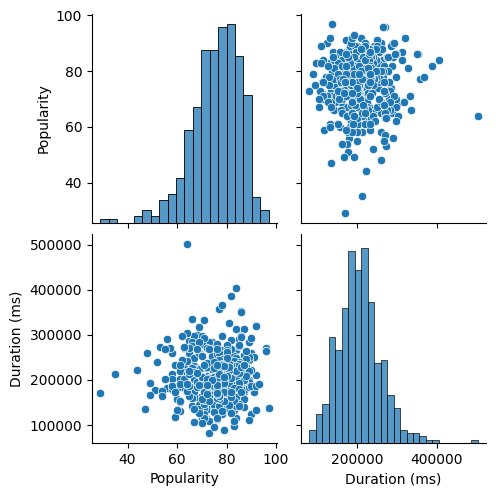

In [49]:
# 8. Pair plot for numerical relationships
sns.pairplot(df3[['Popularity', 'Duration (ms)']])
plt.show()

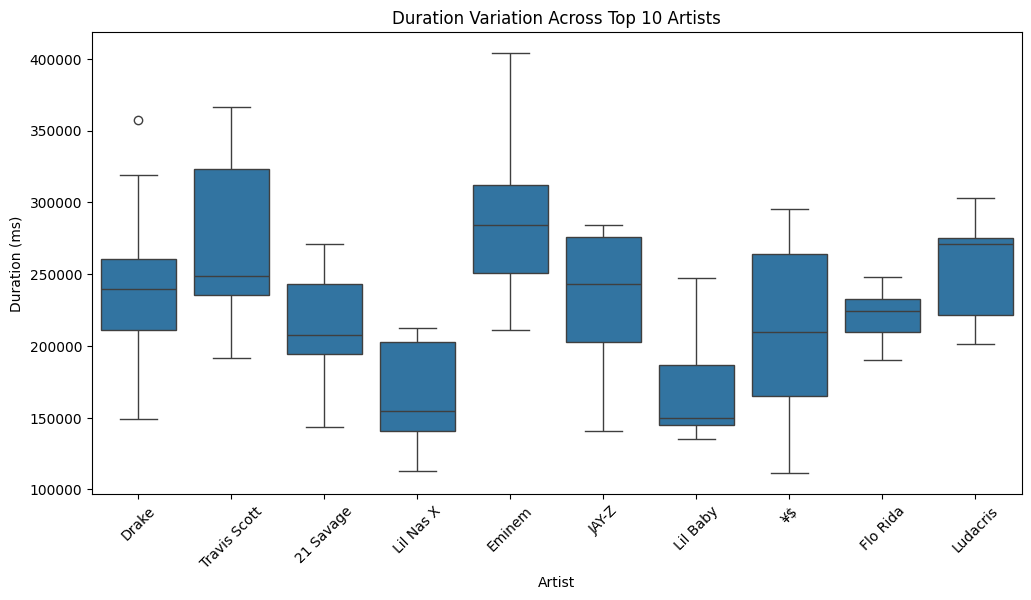

In [50]:
# 9. Box plot for duration variation across artists
plt.figure(figsize=(12,6))
top_artists = df3['Artist'].value_counts().index[:10]
sns.boxplot(x='Artist', y='Duration (ms)', data=df3[df3['Artist'].isin(top_artists)])
plt.xticks(rotation=45)
plt.title("Duration Variation Across Top 10 Artists")
plt.show()



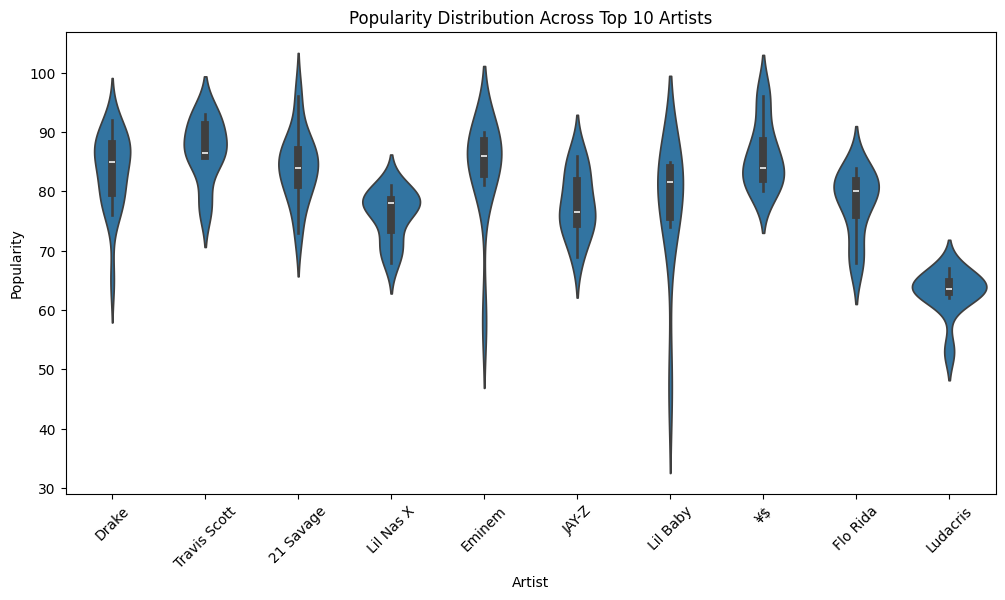

In [51]:
# 10. Violin plot for popularity distribution across artists
plt.figure(figsize=(12,6))
sns.violinplot(x='Artist', y='Popularity', data=df3[df3['Artist'].isin(top_artists)])
plt.xticks(rotation=45)
plt.title("Popularity Distribution Across Top 10 Artists")
plt.show()
